# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Python For BigData @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

### <font color='brown'>Classification : MNIST 의류 이미지 분류</font>

> 학습내용 : 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련
> - 상세 내용을 모두 이해하지 못하더라도, TensorFlow2.x에서 동작하는 프로그램을 빠르게 살펴 보겠습니다. 
> - 텐서플로 모델을 만들고 훈련할 수 있는 고수준 API인 [tf.keras](https://www.tensorflow.org/guide/keras)를 사용

In [1]:
# TensorFlow2.x and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.9.1'

### 패션 MNIST 데이터셋 임포트하기

> - 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 사용
> - 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다.

<table>
  <tr>
    <td>
      <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">
    </td>
  </tr>
  <tr>
    <td align="center">
      <b>Fig.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br>&nbsp;
    </td>
  </tr>
</table>

- 학습 : 60,000개의 이미지를 사용하여 네트워크를 훈련하고 
- 평가 : 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가
- Data : TensorFlow에서 직접 [Fashion MNIST 데이터](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)에 액세스하여 가져오고 로딩

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
type(train_images), type(train_labels), type(test_images), type(test_labels)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [4]:
len(train_images), len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환 :
> 
> - `train_images`와 `train_labels` 배열은 모델 학습에 사용되는 *훈련 세트* 이고,
> - `test_images`와 `test_labels` 배열은 모델 테스트에 사용되는 *테스트 세트* 이다.
> <br/>
> - 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 
> - *레이블*(label)은 0에서 9까지의 정수 배열입니다. → 이 값은 이미지에 있는 옷의 *클래스*(class)를 나타냅니다:
>
><table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

> - 각 이미지는 하나의 레이블에 매핑되어 있습니다. 
> - 데이터셋에 *클래스 이름*이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다

In [5]:
class_names = ['T-shirt/top',  'Trouser',  'Pullover',  'Dress', 'Coat',
               'Sandal',       'Shirt',    'Sneaker',   'Bag',   'Ankle boot' ]

### 데이터 탐색

> 모델을 훈련하기 전에 데이터셋 구조를 파악한다. 

훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다

In [6]:
train_images.shape

(60000, 28, 28)

각 레이블은 0과 9사이의 정수입니다:

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
sorted(set(train_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

테스트 세트에는 10,000개의 이미지가 있습니다. 이 이미지도 28x28 픽셀로 표현됩니다:

In [9]:
test_images.shape

(10000, 28, 28)

테스트 세트는 10,000개의 이미지에 대한 레이블을 가지고 있습니다:

In [10]:
len(test_labels)

10000

### 데이터 전처리
> 
> 네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 

훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

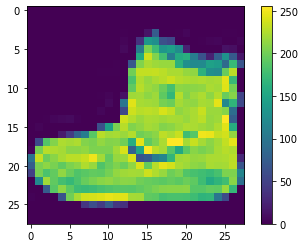

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정한다
> - 이렇게 하려면 255로 나누어야 합니다.
> - *훈련 세트*와 *테스트 세트*를 동일한 방식으로 전처리하는 것이 중요합니다.

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

*훈련 세트*에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해 보자
> 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

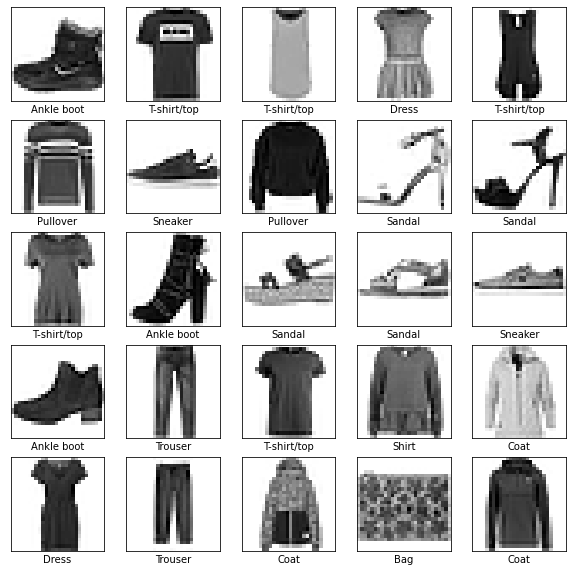

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])    # 분류 라벨명
plt.show()

### 모델 구성
> 
> 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

#### 층 설정
> 
> - 신경망의 기본 빌딩 블록은 [*레이어*](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 입니다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출합니다. 이러한 표현은 당면한 문제에 의미가 있어야 합니다.
> 
> - 대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

- 이 네트워크의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.

- 픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결됩니다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 첫 번째 `Dense` 층은 128개의 노드(또는 뉴런)를 가집니다. 두 번째 (마지막) 층은 10개의 노드의 *소프트맥스*(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.

<hr>

#### 모델 컴파일
> 모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 [*컴파일*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) 단계에서 추가됩니다.
> - [*손실 함수*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) : 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
> - [*옵티마이저*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) : 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
> - [*메트릭*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) : 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 
> <br/> → 지금 예제에서는 올바르게 분류된 이미지의 비율인 <b>*정확도(accuracy)*</b> 를 사용합니다.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 모델 훈련
> 
> 신경망 모델을 훈련하려면 다음 단계가 필요합니다.
> 
> 1. 훈련 데이터를 모델에 주입합니다. → `train_images`와 `train_labels` 배열
> 2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
> 3. 테스트 세트에 대한 모델의 예측을 만듭니다 → `test_images` 배열 
> 4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인합니다.


#### 모델 피드
> 
> 훈련을 시작하려면 [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드를 호출합니다. <br/>
> 모델을 훈련 데이터에 "맞추기(fit)" 때문에 이렇게 불립니다. ^^;;

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.4976 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.3766 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.3355 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 2s 960us/step - loss: 0.3134 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2944 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.2796 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.2670 - accuracy: 0.9019
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2564 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.2485 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step

- 모델이 훈련되면서 손실과 정확도 지표가 출력됩니다. 
<!-- <br/> - 이 모델은 훈련 세트에서 약 0.91(91%) 정도의 정확도를 달성합니다.-->
- epochs=10이라면, 전체 데이터를 10번 사행해서 학습을 거치는 것입니다.
<br/> - 우리는 모델을 만들 때 적절한 epoch 값을 설정해야만 underfitting과 overfitting을 방지할 수 있습니다.
<br/> - epoch 값이 너무 작다면 underfitting이, 너무 크다면 overfitting이 발생할 확률이 높습니다.

#### 정확도 평가
> 
> 다음으로, 모델이 테스트 데이터세트에서 작동하는 방식을 비교합니다.

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3361 - accuracy: 0.8812 - 345ms/epoch - 1ms/step

Test accuracy: 0.8812000155448914


#### 예측하기

> 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 

모델의 선형 출력, [로짓](https://developers.google.com/machine-learning/glossary#logits). 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다. 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 786us/step


여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 첫 번째 예측을 확인해 보죠:

In [20]:
predictions[0]

array([7.6860749e-07, 3.0633142e-08, 3.8983425e-09, 1.2945017e-11,
       1.6784065e-07, 3.9609685e-03, 3.9634426e-07, 1.5703358e-02,
       2.8666354e-06, 9.8033136e-01], dtype=float32)

이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. <br/> → 가장 높은 신뢰도를 가진 레이블은?

In [21]:
np.argmax(predictions[0])

9

모델은 이 이미지가 앵클 부츠(`class_name[9]`)라고 가장 확신하고 있습니다. <br/>이 값이 맞는지 테스트 레이블을 확인해 본다.

In [22]:
test_labels[0]

9

10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:

In [23]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                   100*np.max(predictions_array),
                                   class_names[true_label]),
                                   color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



#### 예측 확인
> 
> 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다.

0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.

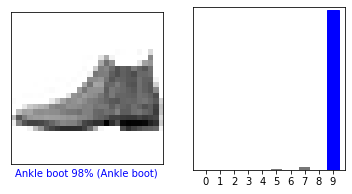

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

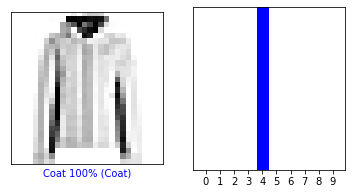

In [25]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

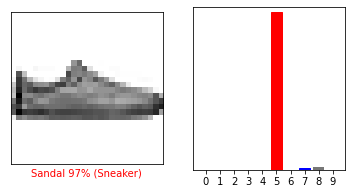

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

몇 개의 이미지의 예측을 출력해 봅니다. 
> - 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 
> - 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

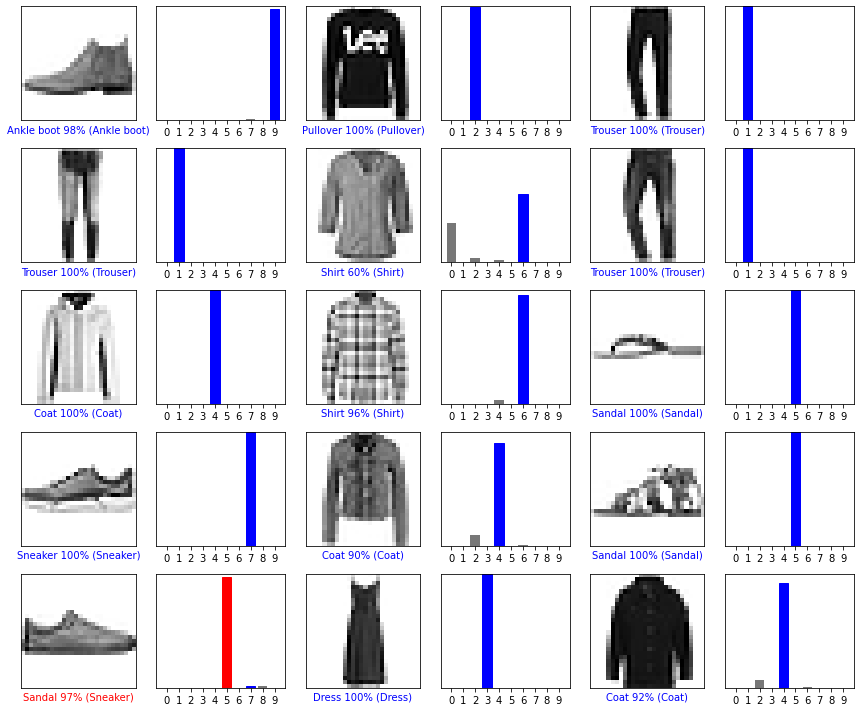

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()

### 훈련된 모델 사용하기
> 
> 마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` 모델은 한 번에 샘플의 묶음 또는 *배치*(batch)로 예측을 만드는데 최적화되어 있습니다. <br/>
하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


이제 이 이미지의 예측을 만듭니다:

In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 12ms/step
[[5.8937621e-05 2.2611535e-13 9.9877423e-01 4.0400067e-14 1.1541386e-03
  2.2893460e-11 1.2602561e-05 1.0088232e-20 1.1971755e-13 4.2240639e-15]]


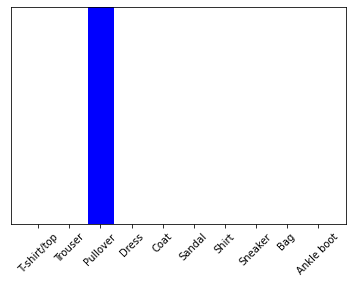

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict`는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환합니다. <br/>
배치에서 (유일한) 이미지에 대한 예측을 가져옵니다.

In [32]:
pred_idx = np.argmax(predictions_single[0])
pred_idx

2

In [33]:
class_names[pred_idx]

'Pullover'

예상과 같이 모델이 레이블을 예측합니다.

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>